# Task 3

Taking the best model from Task 2, you need to repeat the validation stage with that model and optimise the classification threshold. You can choose the method to optimise the classification method – e.g. by plotting and analysing the ROC curves, by ensuring a maximum FPR, or by using methods such as Youden, but you will need to give a rationale of why the method of your choice and how it may or may not be important for the malware detection domain. 

With the best model and the best threshold, evaluate it again on the test data as in Task 2. Once more, you need to explain and justify your choices throughout the task and interpret the results adequately. Recall to clearly justify the choice of the threshold.

---

### Imports and sampling of data

In [1]:
# libraries
import pandas as pd
from matplotlib import pyplot
from sklearn import metrics 
from sklearn.model_selection import KFold
import numpy as np 
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
from sklearn import metrics 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
#paths to the file containing the samples with the processed features
feature_of_counts = "../processed_data/feature_vectors_counts.csv"

In [3]:
# Importing the dataset, and performing an undersampling of the benignware
dataset = pd.read_csv(feature_of_counts, index_col=0)

malware= dataset.loc[dataset["malware"] == True]
benign = dataset.loc[dataset["malware"] == False]
benign_undersample = benign.sample(n=len(malware), replace= False, random_state=42)

dataset= pd.concat([malware, benign_undersample])
X = dataset.iloc[:,1:9].values
y = dataset.iloc[:, 9].values

In [4]:
# Splitting (randomly) the dataset into the Training set and the (unseen) Test set
# Note this is only for the first task of the coursework. You'll need a different approach for the other tasks, as they also need a validation stage in addition to the test with unseen data.
# Also note the split is training 80% and test 20%) 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y.astype(int), random_state=42, test_size = 0.2)

In [5]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

---

### Optimizing threshold

In [6]:
from sklearn.ensemble import RandomForestClassifier

## Best parameters found in previous task
clf = RandomForestClassifier(min_samples_leaf=1, max_features="sqrt", random_state=42)

In [7]:
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [8]:
y_scores = clf.predict_proba(X_test)[:, 1]

In [9]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_scores)

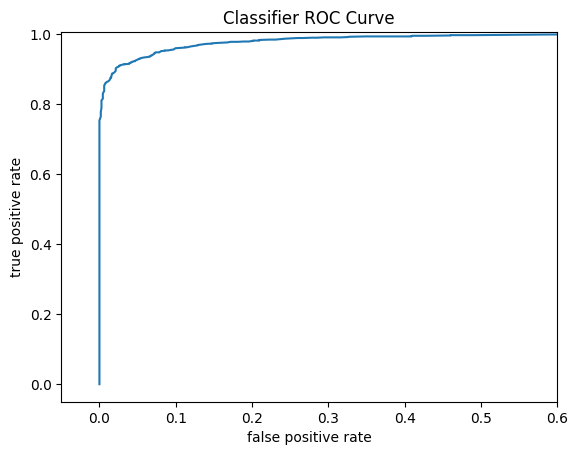

In [53]:
plt.plot(fpr, tpr)
plt.xlabel('false positive rate')
plt.xlim([-0.05, 0.6])
plt.ylabel('true positive rate')
plt.ylim([-0.05, 1.005])
plt.title('Classifier ROC Curve')
plt.show()

In [21]:
# Assume fpr, tpr, thresholds are obtained from roc_curve
index = np.where(fpr <= 0.08)[0][-1]  # Get the last index where FPR is less than or equal to 0.08
desired_threshold = thresholds[index]
print(desired_threshold)

0.46


Accuracy: 0.93
Precision: 0.92
Recall: 0.95
F1 Score: 0.93
Confusion Matrix:
 [[1035   88]
 [  58 1043]]


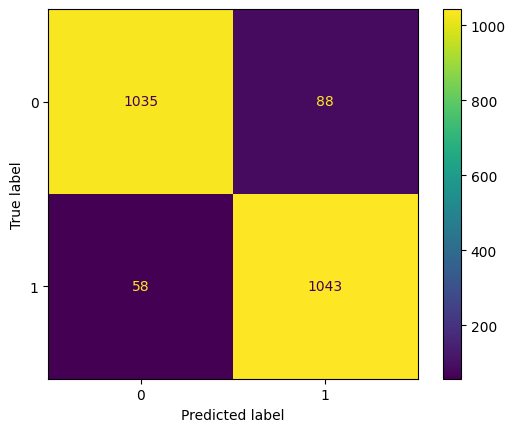

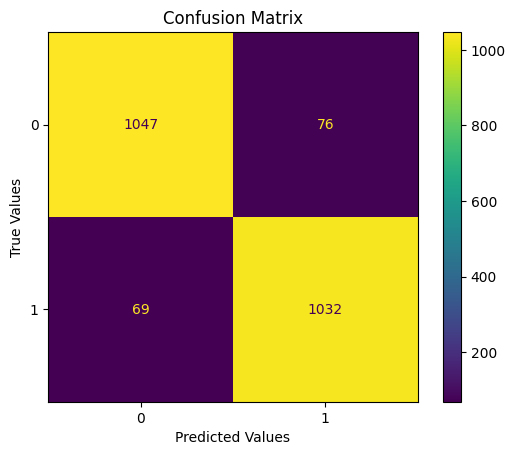

In [22]:
threshold = desired_threshold  # Example threshold

# Apply threshold to convert probabilities to binary predictions
predictions = (y_scores >= threshold).astype(int)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Calculate metrics
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

# Display results
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions)
print('Confusion Matrix:\n', conf_matrix)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.show()

ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)
plt.title('Confusion Matrix')
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show()
